## Decision Tree Algorithm for Regressor

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

### Loading Data Set

In [48]:
# loading dataset
def getData(strt_date = "2019-01-01", end_date = "2019-12-31"):
    
    FF = pd.read_csv("C:\\Users\\sshai\\Desktop\\Northeastern University\\INFO 7374 ML In Finance\\INFO-7374-Machine-Learning-in-Finance\\Dashboard\\Shaishav\\fulldata.csv")
    # Date format change
    FF["Date"] = pd.to_datetime(FF["Date"])
    # Data selection
    df = FF[(FF["Date"] >= strt_date) & (FF["Date"] <= end_date)]
    # Reset Index
    df = df.reset_index()
    df = df.drop(["index"], axis =1)
    # Average Column and no. of days calculations
    df["Average"] = (FF["Open"] + 2*FF["High"] + FF["Close"])/4
    df["Days"] = range(1,df.shape[0]+1)
    df["delta_Open"] = (df.Open - df.Open.shift(periods=1))
#     df["delta_Close"] = (df.Close - df.Close.shift(periods=1))
#     df["delta_RMW"] = (df.RMW - df.RMW.shift(periods=1))
#     df["delta_SMB"] = (df.SMB - df.SMB.shift(periods=1))
#     df["delta_MktRF"] = (df["Mkt-RF"] - df["Mkt-RF"].shift(periods=1))
#     df["delta_HML"] = (df.HML - df.HML.shift(periods=1))
#     df["delta_CMA"] = (df.CMA - df.CMA.shift(periods=1))
#     df["delta_Average"] = (df.Average - df.Average.shift(periods=1))
    df = df.dropna().reset_index(drop=True)
    
    df["label"] = df.delta_Open
    df = df.drop("delta_Open", axis=1)
    
    return df

In [50]:
## One year data
df = getData()

## Removing correlated columns
df = df[["Date","Days","RF","RMW","Volume","SMB","Mkt-RF","HML","CMA","Average","Close","Open","label"]]
df.columns

Index(['Date', 'Days', 'RF', 'RMW', 'Volume', 'SMB', 'Mkt-RF', 'HML', 'CMA',
       'Average', 'Close', 'Open', 'label'],
      dtype='object')

### Data Modification

In [51]:
df_x = df.drop("label", axis =1).shift(periods=1).dropna().reset_index(drop=True)
df_y = df[["label"]].shift(periods=-1).dropna().reset_index(drop=True)
modified_df = pd.concat([df_x,df_y], axis =1)

modified_df

,Date,Days,RF,RMW,Volume,SMB,Mkt-RF,HML,CMA,Average,Close,Open,label
0,2019-01-03,2.0,0.010,-0.25,9820200.0,0.52,-2.45,1.23,0.91,53.531250,90.639999,90.940002,-0.100006
1,2019-01-04,3.0,0.010,-0.09,10565700.0,0.39,3.55,-0.74,-0.58,52.343750,92.489998,90.839996,1.070007
2,2019-01-07,4.0,0.010,-0.70,9012500.0,0.82,0.94,-0.67,-0.41,53.984375,92.120003,91.910004,0.789993
3,2019-01-08,5.0,0.010,0.35,9551300.0,0.44,1.01,-0.53,-0.09,57.507812,92.459999,92.699997,-0.009995
4,2019-01-09,6.0,0.010,0.09,15015600.0,0.51,0.56,-0.04,-0.18,58.296875,90.949997,92.690002,-1.800003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2019-12-23,247.0,0.007,-0.12,6619500.0,0.16,0.10,-0.28,0.31,37.101562,124.900001,125.519997,-0.729996
246,2019-12-24,248.0,0.007,-0.28,2022100.0,0.36,0.01,-0.07,0.02,37.156250,125.220001,124.790001,0.309998
247,2019-12-26,249.0,0.007,0.23,4760400.0,-0.56,0.49,0.00,-0.19,37.203125,125.220001,125.099999,0.459999
248,2019-12-27,250.0,0.007,0.24,5192000.0,-0.54,-0.09,-0.07,0.16,38.687500,126.089996,125.559998,0.200004


### Test/ Train Data set

In [62]:
## Train and Test Data
train_start_date = "2019-01-01"
train_end_date =  "2019-10-31"
test_start_date = "2019-11-01"
test_end_date = "2019-12-31"
df_train = df[(df["Date"] >= train_start_date) & (df["Date"] <= train_end_date)]
df_test = df[(df["Date"] >= test_start_date) & (df["Date"] <= test_end_date)]
df_train = df_train.drop(["Date","Days"], axis=1)
df_test = df_test.drop(["Date","Days"], axis=1)

In [63]:
df_train.head()

,RF,RMW,Volume,SMB,Mkt-RF,HML,CMA,Average,Close,Open,label
0,0.01,-0.25,9820200,0.52,-2.45,1.23,0.91,53.531250,90.639999,90.940002,-0.089996
1,0.01,-0.09,10565700,0.39,3.55,-0.74,-0.58,52.343750,92.489998,90.839996,-0.100006
2,0.01,-0.70,9012500,0.82,0.94,-0.67,-0.41,53.984375,92.120003,91.910004,1.070007
3,0.01,0.35,9551300,0.44,1.01,-0.53,-0.09,57.507812,92.459999,92.699997,0.789993
4,0.01,0.09,15015600,0.51,0.56,-0.04,-0.18,58.296875,90.949997,92.690002,-0.009995


In [64]:
df_test.head()

,RF,RMW,Volume,SMB,Mkt-RF,HML,CMA,Average,Close,Open,label
210,0.006,-0.21,6010100,0.60,1.08,0.85,0.11,35.218750,123.870003,124.830002,0.040001
211,0.006,0.62,10351400,0.34,0.40,1.46,0.11,34.429688,119.070000,123.919998,-0.910004
212,0.006,0.00,9239600,0.40,-0.03,0.48,-0.01,34.171875,118.900001,118.830002,-5.089996
213,0.006,-0.16,6755900,-0.79,-0.05,0.15,0.28,34.343750,120.320000,119.099999,0.269997
214,0.006,0.20,8909700,0.02,0.38,0.56,-0.12,34.429688,119.620003,120.339996,1.239998


### Helper Functions

#### Check Purity?

In [65]:
def check_purity(data):
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

#### Check leaf for regressor

In [66]:
def create_leaf(data):
    label_column = data[:, -1]
    leaf = np.mean(label_column)
    return leaf

#### Number of potential split

In [67]:
def get_potential_splits(data, random_subspace):
    
    potential_splits = {}
    _, n_columns = data.shape
    
    column_indices = list(range(n_columns-1))       # excluding the last column which is the label
    
    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(population=column_indices, k=random_subspace)
    
    for column_index in column_indices:          
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
        
    return potential_splits

#### Split Data

In [68]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

#### Calculate best split

In [69]:
def calculate_mse(data):
    
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)
    
    return mse

In [70]:
def calculate_overall_metric(data_below, data_above, metric_function):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below) 
                     + p_data_above * metric_function(data_above))
    
    return overall_metric


In [71]:
def determine_best_split(data, potential_splits):
    
    first_iteration = True
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)

            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False
                
                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

#### Determine Type of Feature

In [72]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

#### Bootstrapping

In [73]:
def bootstrapping(train_df, n_bootstrap):
    
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

### Decision Tree Algorithm for Regressor

In [74]:
def decision_tree_algorithm(df, counter=0, min_samples=5, max_depth=5, random_subspace=None):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data)
        return leaf

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data, random_subspace)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data)
            return leaf
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, random_subspace)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, random_subspace)
        
        # If yes_answer = no_answer
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

### Random Forest Alogorithm for Regressor

In [75]:
def random_forest_algorithm(df_train, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(df_train, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

### Predictions

In [76]:
def predict_example(example, tree):
    record = list()
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [77]:
def decision_tree_predictions(df_test, tree):
    predictions = df_test.apply(predict_example, args=(tree,), axis=1)
    return predictions

In [78]:
def random_forest_predictions(df_test, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(df_test, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

### Evaluation

In [79]:
def calculate_r_squared(predictions, labels):    
    mean = labels.mean()
    ss_res = sum((labels - predictions) ** 2)
    ss_tot = sum((labels - mean) ** 2)
    r_squared = 1 - ss_res / ss_tot
    
    return r_squared

In [92]:
forest = random_forest_algorithm(df_train, n_trees=2, n_bootstrap=200, n_features=3, dt_max_depth=100)
delta_Open_pred = random_forest_predictions(df_test, forest)

In [93]:
df_srs = pd.DataFrame(list(zip(delta_Open_pred,df_test.label.values, df_test.Open.values)), columns = ["predictions","Actual","Open_Act"])
df_srs["Open_pred"] = df_srs.predictions + df_test.Open.shift(1).reset_index(drop=True)
df_srs = df_srs.dropna().reset_index(drop=True)

In [94]:
from sklearn.metrics import mean_squared_error
def cal_rmse(predictions, labels):
    mse = mean_squared_error(labels,predictions)
    rmse = np.sqrt(mse)
    return rmse

In [95]:
cal_rmse(list(df_srs.Open_pred.values), list(df_srs.Open_Act.values))

1.6039972238727476

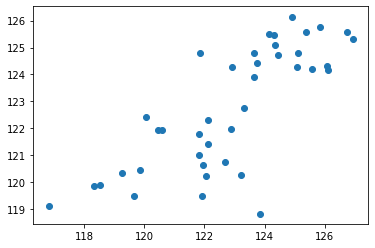

In [96]:
plt.scatter(list(df_srs.Open_pred.values), list(df_srs.Open_Act.values))

In [97]:
abc = calculate_r_squared(df_srs.Open_pred, df_srs.Open_Act)
abc

0.4913839465277918

In [100]:
grid_search = {"max_depth": [], "trees": [], "rmse_test": [], "r_squared_test": []}
for max_depth in range(1, 7):
    for trees in range(1,10):
        forest = random_forest_algorithm(df_train, n_trees=trees, n_bootstrap=150, n_features=3, dt_max_depth=4)
        delta_Open_pred = random_forest_predictions(df_test, forest)
        df_srs = pd.DataFrame(list(zip(delta_Open_pred,df_test.label.values, df_test.Open.values)), columns = ["predictions","Actual","Open_Act"])
        df_srs["Open_pred"] = df_srs.predictions + df_test.Open.shift(1).reset_index(drop=True)
        df_srs = df_srs.dropna().reset_index(drop=True)
        
        rmse_test = cal_rmse(list(df_srs.Open_pred.values), list(df_srs.Open_Act.values))
        r_squared_test = calculate_r_squared(df_srs.Open_pred, df_srs.Open_Act)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["trees"].append(trees)
        grid_search["rmse_test"].append(rmse_test)
        grid_search["r_squared_test"].append(r_squared_test)
        
    print(f"Progress: Iteration {max_depth}/6")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_test", ascending=False).head()

Progress: Iteration 1/6
Progress: Iteration 2/6
Progress: Iteration 3/6
Progress: Iteration 4/6
Progress: Iteration 5/6
Progress: Iteration 6/6


,max_depth,trees,rmse_test,r_squared_test
19,3,2,1.010044,0.798320
27,4,1,1.189366,0.720351
3,1,4,1.210197,0.710469
2,1,3,1.214844,0.708241
33,4,7,1.216975,0.707217


In [102]:
for i in range(25,200,25):
    print(i)

25
50
75
100
125
150
175
